
Importing the Dependencies

In [1]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Data Collection and Analysis

PIMA Diabetes Dataset

In [3]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('D:\project diabetes prediction\diabetes.csv')

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\sufiy\AppData\Local\Temp\ipykernel_6656\3186439929.py:2: SyntaxWarning: invalid escape sequence '\p'
  diabetes_dataset = pd.read_csv('D:\project diabetes prediction\diabetes.csv')


In [4]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | lib.NoDefault' = <no_default

In [5]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [8]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
diabetes_dataset.duplicated().sum()

np.int64(0)

In [13]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [15]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [16]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [17]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data = scaler.transform(X)

In [22]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [24]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**visualization**

Histogram of Glucose Levels

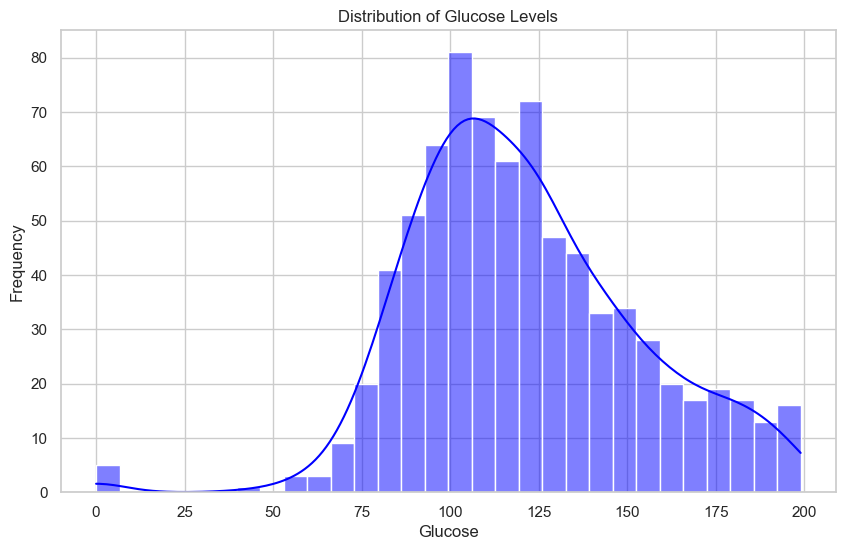

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Histogram of Glucose levels
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_dataset['Glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()


Scatter Plot of Age vs. BMI

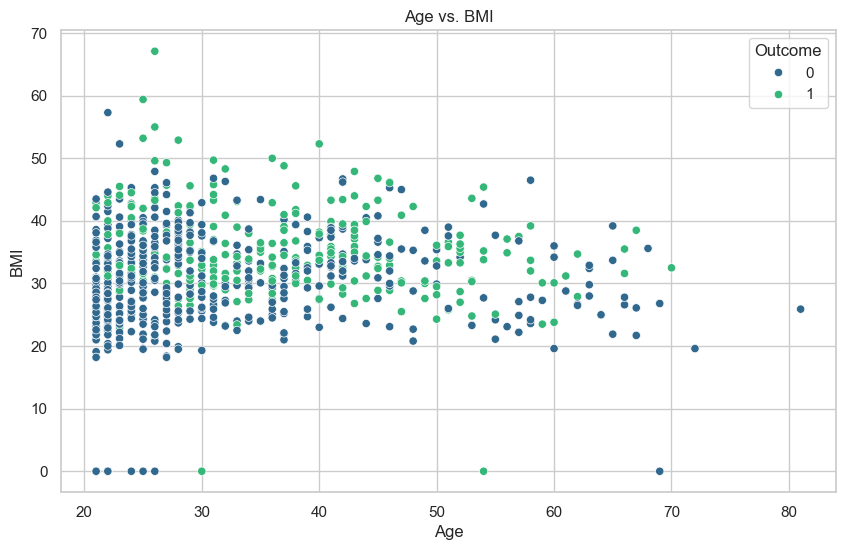

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Scatter plot of Age vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', data=diabetes_dataset, hue='Outcome', palette='viridis')
plt.title('Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


Box Plot of Blood Pressure by Outcome

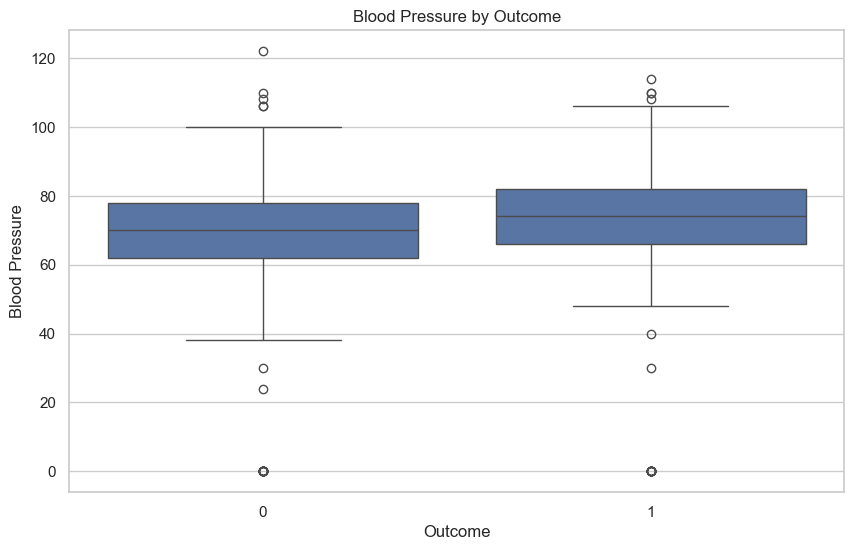

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Box plot of BloodPressure by Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=diabetes_dataset)
plt.title('Blood Pressure by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Blood Pressure')
plt.show()


Correlation Heatmap

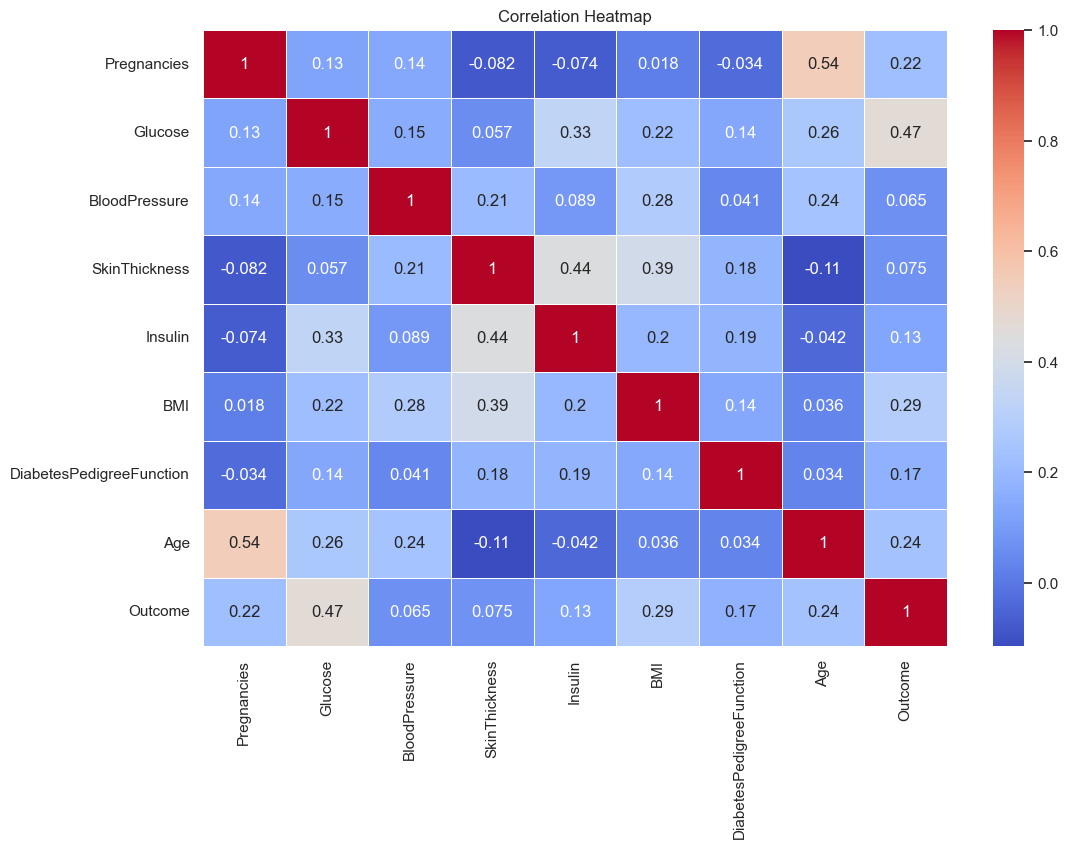

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = diabetes_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


 Pie Chart of Outcome Distribution

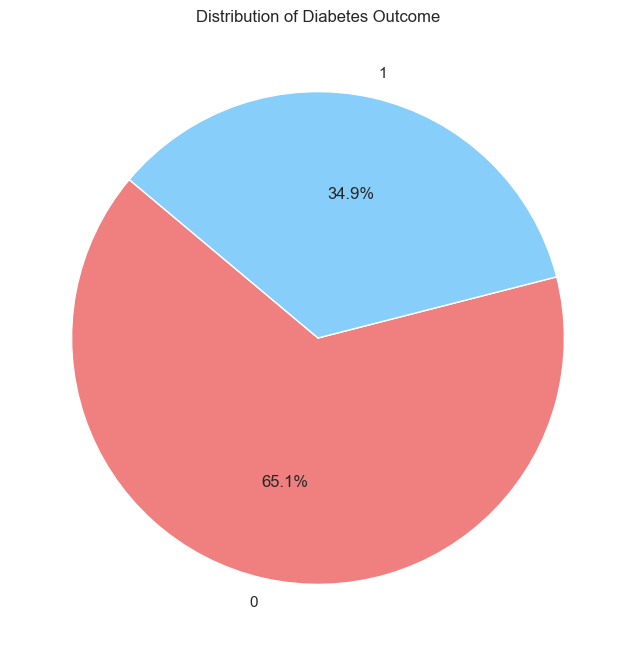

In [29]:
import matplotlib.pyplot as plt

# Pie chart of Outcome distribution
outcome_counts = diabetes_dataset['Outcome'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribution of Diabetes Outcome')
plt.show()


Bar Chart of Average BMI by Age Group

C:\Users\sufiy\AppData\Local\Temp\ipykernel_6656\2556688726.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bmi_by_age_group = diabetes_dataset.groupby(age_groups)['BMI'].mean().reset_index()
C:\Users\sufiy\AppData\Local\Temp\ipykernel_6656\2556688726.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_groups, y='BMI', data=avg_bmi_by_age_group, palette='viridis')


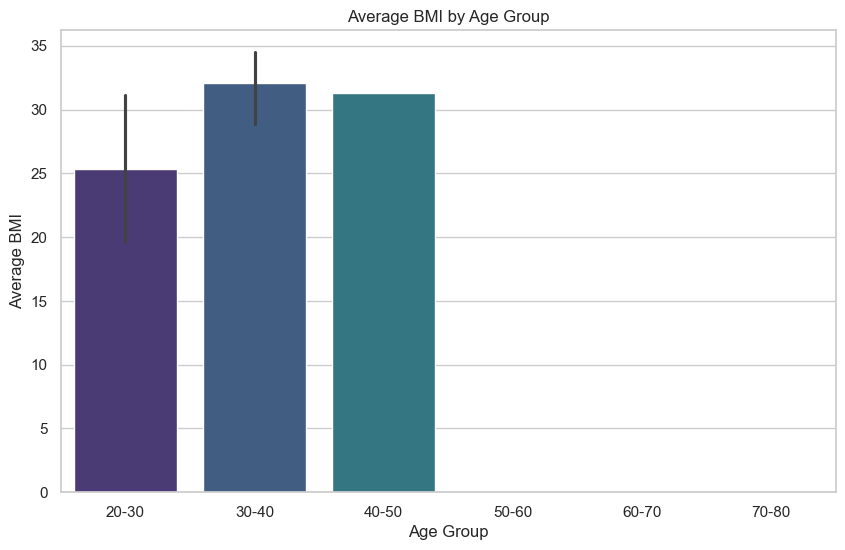

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create age groups
age_groups = pd.cut(diabetes_dataset['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Bar chart of average BMI by age group
plt.figure(figsize=(10, 6))
avg_bmi_by_age_group = diabetes_dataset.groupby(age_groups)['BMI'].mean().reset_index()
sns.barplot(x=age_groups, y='BMI', data=avg_bmi_by_age_group, palette='viridis')
plt.title('Average BMI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.show()


Bar Chart of Number of Pregnancies by Outcome

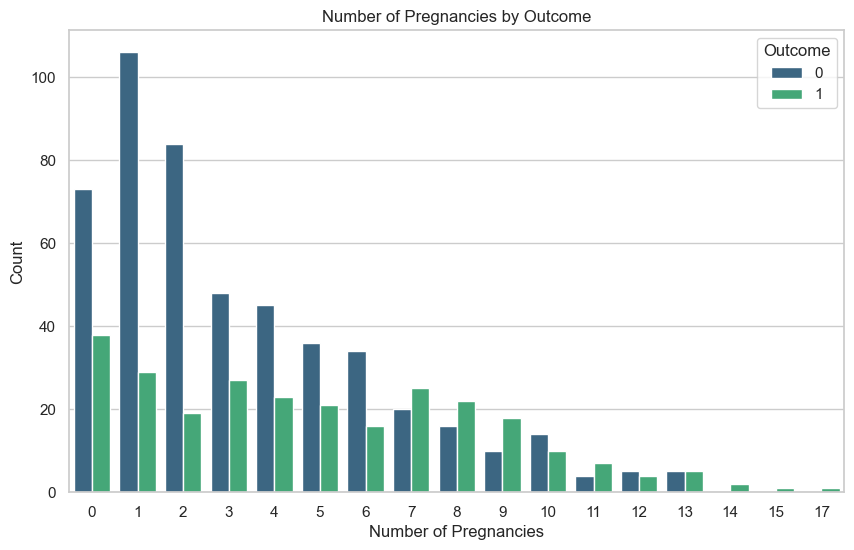

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of number of Pregnancies by Outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=diabetes_dataset, palette='viridis')
plt.title('Number of Pregnancies by Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.show()


Count Plot of Age Groups by Outcome

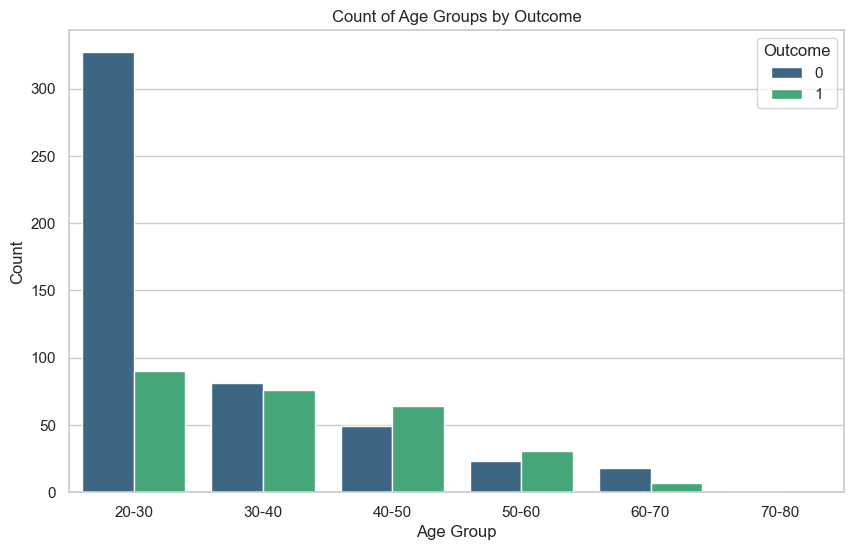

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create age groups
age_groups = pd.cut(diabetes_dataset['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Count plot of Age Groups by Outcome
plt.figure(figsize=(10, 6))
sns.countplot(x=age_groups, hue='Outcome', data=diabetes_dataset, palette='viridis')
plt.title('Count of Age Groups by Outcome')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


Line Plot of Age vs. Glucose with Outcome

C:\Users\sufiy\AppData\Local\Temp\ipykernel_6656\2877599053.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='Glucose', hue='Outcome', data=diabetes_dataset, palette='viridis', ci=None)


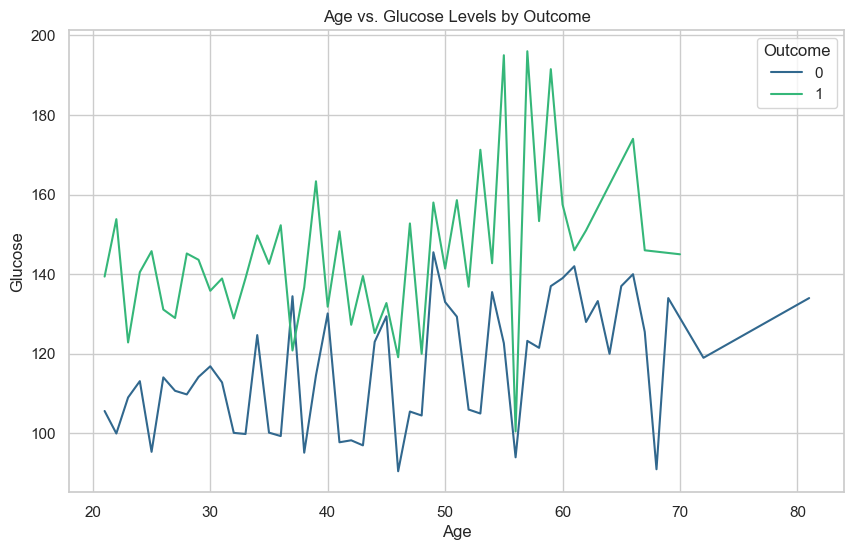

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of Age vs. Glucose with Outcome
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Glucose', hue='Outcome', data=diabetes_dataset, palette='viridis', ci=None)
plt.title('Age vs. Glucose Levels by Outcome')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()


 Bar Plot of Average Insulin by Number of Pregnancies

C:\Users\sufiy\AppData\Local\Temp\ipykernel_6656\1564789508.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pregnancies', y='Insulin', data=avg_insulin_by_pregnancies, palette='viridis')


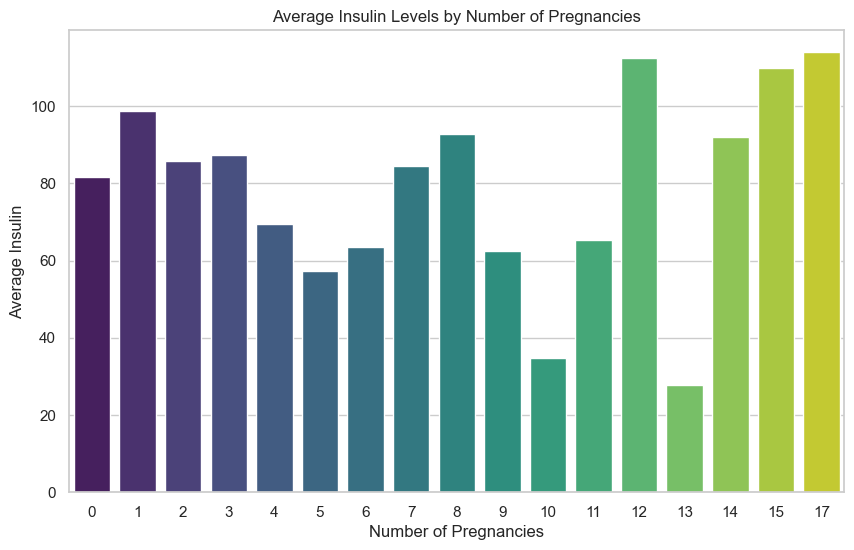

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of average Insulin by number of Pregnancies
plt.figure(figsize=(10, 6))
avg_insulin_by_pregnancies = diabetes_dataset.groupby('Pregnancies')['Insulin'].mean().reset_index()
sns.barplot(x='Pregnancies', y='Insulin', data=avg_insulin_by_pregnancies, palette='viridis')
plt.title('Average Insulin Levels by Number of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Average Insulin')
plt.show()


Train Test Split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [37]:
classifier = svm.SVC(kernel='linear')

In [38]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [39]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [41]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [43]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**decision tree classifier**

In [44]:
classifier = DecisionTreeClassifier()


In [45]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [46]:
#accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)


Accuracy score of the training data :  1.0


In [47]:
#accuracy on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7077922077922078


In [48]:
# Making a prediction for a new sample
input_data = (5,166,72,19,175,25.8,0.587,51)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**logistic regression**

In [49]:
classifier = LogisticRegression()

In [50]:
classifier.fit(X_train, Y_train)

LogisticRegression()

In [51]:
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7850162866449512


In [52]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7597402597402597


In [53]:
# Making a prediction for a new sample
input_data = (5,166,72,19,175,25.8,0.587,51)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**random forest classifier**

In [54]:
classifier = RandomForestClassifier()

In [55]:
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [56]:
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [57]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7337662337662337


In [58]:
# Making a prediction for a new sample
input_data = (5,166,72,19,175,25.8,0.587,51)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:



# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store the accuracy results
accuracy_results = {}


# Evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    accuracy_results[name] = accuracy
    

# Identify the classifier with the highest accuracy
best_classifier = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_classifier]

# Print the results
print("Classifier Accuracies:")
for name, accuracy in accuracy_results.items():
    print(f"{name}: {accuracy:.2f}")

print(f"\nBest Classifier: {best_classifier} with an accuracy of {best_accuracy:.2f}")


Classifier Accuracies:
Logistic Regression: 0.76
Support Vector Machine: 0.73
Decision Tree: 0.69
Random Forest: 0.74

Best Classifier: Logistic Regression with an accuracy of 0.76


**plotting the bar chart for ranking classifier**

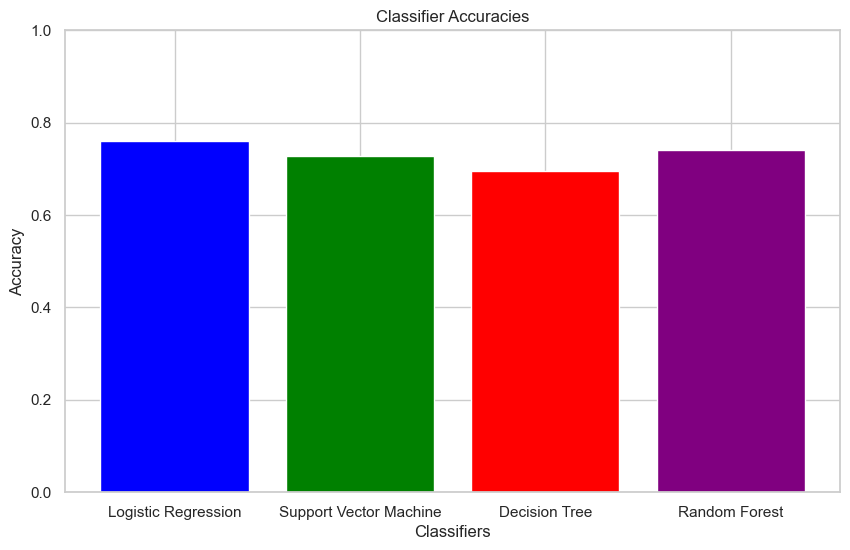

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.ylim(0, 1)
plt.show()

here we can see the best classifier is logistic regression


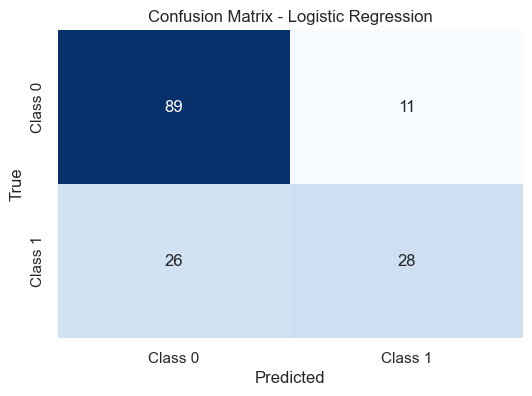

Logistic Regression - Accuracy: 0.76
Confusion Matrix:
[[89 11]
 [26 28]]


In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns

# Define and train the Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train, Y_train)

# Predict using the trained classifier
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Print the accuracy and confusion matrix
print(f"Logistic Regression - Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{cm}")


In [62]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset (replace 'diabetes.csv' with your actual file)
df = pd.read_csv("diabetes.csv")  

# Assuming the last column is the target (adjust if needed)
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values  

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Save the trained model
with open("diabetes_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully.")


Model Accuracy: 0.75
Model and scaler saved successfully.
